In [3]:
import pandas as pd
from fbprophet import Prophet

In [35]:
link="https://raw.githubusercontent.com/HaloReach2552/Facebook-prophet/main/dataset.csv"

df=pd.read_csv(link)
df.head(4)

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000


In [36]:
df["Day"]=df["Time Date"].apply(lambda x: str(x)[0])
df["Month"]=df["Time Date"].apply(lambda x: str(x)[-6:-4])
df["Year"]=df["Time Date"].apply(lambda x: str(x)[-4:])
df["ds"]=pd.DatetimeIndex(df["Year"]+'-'+df["Month"]+"-"+df["Day"])

In [37]:
df.head(5)

,Time Date,Product,Store,Value,Day,Month,Year,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,1,01,2018,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2,01,2018,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,3,01,2018,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,4,01,2018,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,5,01,2018,2018-01-05


In [38]:
columns=df.drop(["Time Date","Product","Store","Day","Month","Year"], axis=1)

In [41]:
columns["ds"]=pd.to_datetime(columns["ds"], dayfirst=True)

In [43]:
columns.dtypes

Value           float64
ds       datetime64[ns]
dtype: object

In [46]:
columns.rename(columns={"Value":"y"}, inplace=True)

In [47]:
train= Prophet(interval_width=0.95, daily_seasonality=True)
model=train.fit(columns)

In [50]:
futuro = train.make_future_dataframe(periods=200, freq="D")
fb=train.predict(futuro)
fb.head(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3036.290868,1005.826295,4435.642264,3036.290868,3036.290868,-368.468561,-368.468561,-368.468561,447.989067,...,42.809581,42.809581,42.809581,-859.267208,-859.267208,-859.267208,0.0,0.0,0.0,2667.822307
1,2018-01-02,3037.299142,897.399026,4439.910287,3037.299142,3037.299142,-406.165002,-406.165002,-406.165002,447.989067,...,-13.633517,-13.633517,-13.633517,-840.520552,-840.520552,-840.520552,0.0,0.0,0.0,2631.134140
2,2018-01-03,3038.307415,996.920422,4351.083121,3038.307415,3038.307415,-411.976809,-411.976809,-411.976809,447.989067,...,-26.693469,-26.693469,-26.693469,-833.272407,-833.272407,-833.272407,0.0,0.0,0.0,2626.330607
3,2018-01-04,3039.315689,878.474729,4391.014336,3039.315689,3039.315689,-398.849227,-398.849227,-398.849227,447.989067,...,-10.147776,-10.147776,-10.147776,-836.690517,-836.690517,-836.690517,0.0,0.0,0.0,2640.466463
4,2018-01-05,3040.323963,996.868993,4331.702898,3040.323963,3040.323963,-363.526046,-363.526046,-363.526046,447.989067,...,38.151883,38.151883,38.151883,-849.666996,-849.666996,-849.666996,0.0,0.0,0.0,2676.797917
5,2018-01-06,3041.332237,869.934027,4329.973160,3041.332237,3041.332237,-421.681695,-421.681695,-421.681695,447.989067,...,1.188419,1.188419,1.188419,-870.859181,-870.859181,-870.859181,0.0,0.0,0.0,2619.650542


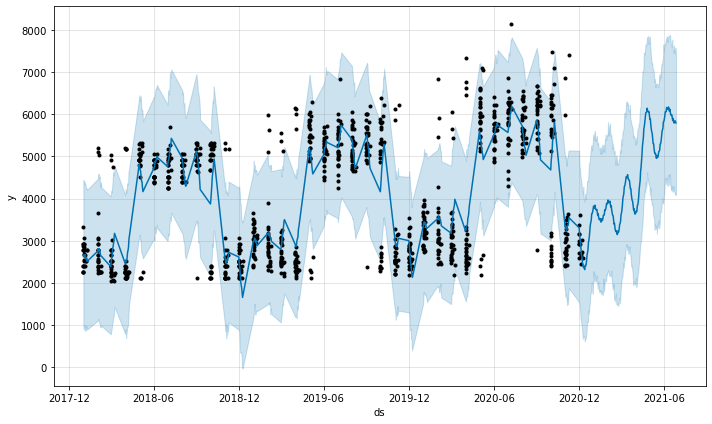

In [51]:
plot1=train.plot(fb)